In [1]:
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Case Study.ipynb',
 'features.csv',
 'Project Description.docx',
 'stores.csv',
 'test.csv',
 'train.csv',
 '~$oject Description.docx']

In [3]:
import pandas as pd
f = pd.read_csv('features.csv')
s = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
# Merging tables for ease of use

In [5]:
f_s = f.merge(s, how= 'inner', on = 'Store')

In [6]:
train = train.merge(f_s, how = 'inner', on = ['Store','Date','IsHoliday'])
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
train = train.sort_values(by = ['Store','Dept','Date']).reset_index(drop = True)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [8]:
test = test.merge(f_s, how = 'inner', on = ['Store','Date','IsHoliday'])
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [9]:
test.sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [12]:
# EDA
df = train

In [70]:
df.describe().transpose().style.background_gradient(cmap='OrRd')

,count,mean,std,min,25%,50%,75%,max
Store,421570.000000,22.200546,12.785297,1.000000,11.000000,22.000000,33.000000,45.000000
Dept,421570.000000,44.260317,30.492054,1.000000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.000000,15981.258123,22711.183519,-4988.940000,2079.650000,7612.030000,20205.852500,693099.360000
Temperature,421570.000000,60.090059,18.447931,-2.060000,46.680000,62.090000,74.280000,100.140000
Fuel_Price,421570.000000,3.361027,0.458515,2.472000,2.933000,3.452000,3.738000,4.468000
MarkDown1,150681.000000,7246.420196,8291.221345,0.270000,2240.270000,5347.450000,9210.900000,88646.760000
MarkDown2,111248.000000,3334.628621,9475.357325,-265.760000,41.600000,192.000000,1926.940000,104519.540000
MarkDown3,137091.000000,1439.421384,9623.078290,-29.100000,5.080000,24.600000,103.990000,141630.610000
MarkDown4,134967.000000,3383.168256,6292.384031,0.220000,504.220000,1481.310000,3595.040000,67474.850000
MarkDown5,151432.000000,4628.975079,5962.887455,135.160000,1878.440000,3359.450000,5563.800000,108519.280000


In [14]:
# A huge disparity between store sizes which explains why they are split into types A,B,C

In [15]:
# Can quickly extract some info from the Date column

In [16]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0

split_date(df)
split_date(test)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [18]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Day                  0
WeekOfYear           0
dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

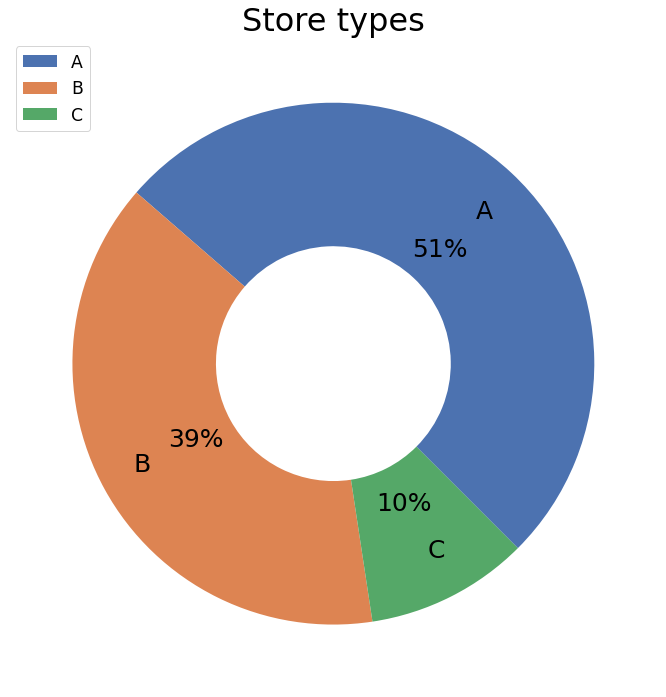

In [183]:
plt.figure(figsize=(12,12))
plt.pie(x = df['Type'].value_counts().values, 
        labels = ['A','B','C'], colors = sns.color_palette('deep'), 
        autopct='%.0f%%',labeldistance=0.80,wedgeprops=dict(width=0.55), 
        startangle=-45, textprops = dict(size = 25,) )
plt.title("Store types",fontsize = 32)
plt.legend(labels = ['A','B','C'], fontsize = 'xx-large');

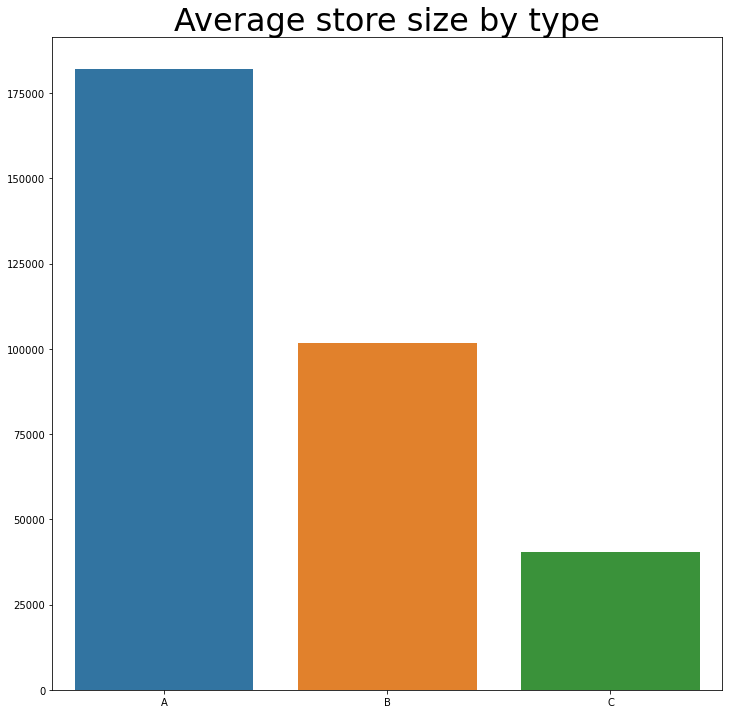

In [182]:
plt.figure(figsize=(12,12))
ax = sns.barplot(data = pd.DataFrame(df.groupby('Type')['Size'].mean().to_dict(), index = ['Type']))
plt.title("Average store size by type",fontsize = 32);

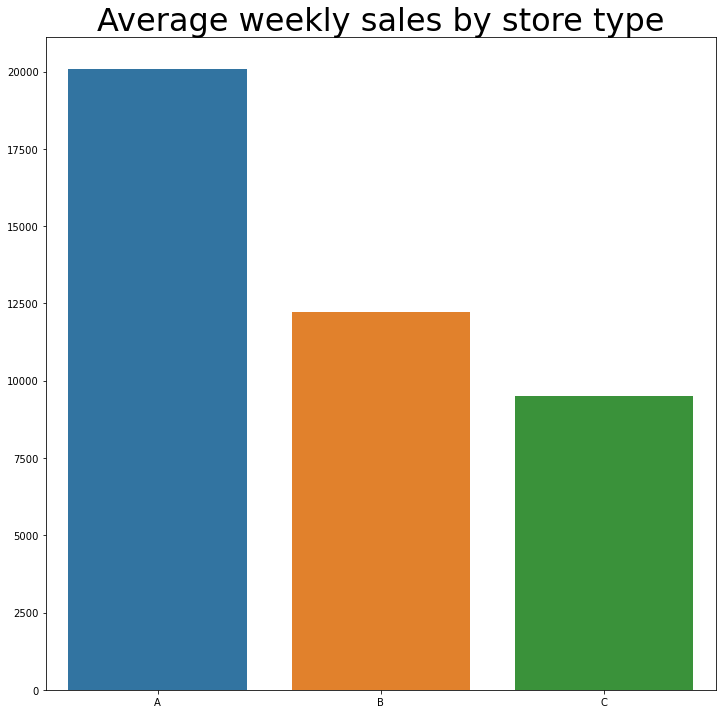

In [197]:
plt.figure(figsize=(12,12))
plt.title("Average weekly sales by store type",fontsize = 32)

ax = sns.barplot(data = pd.DataFrame(df.groupby('Type')['Weekly_Sales'].mean().to_dict(), index = ['Weekly_sales']))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()-2),fontsize = 20,color = 'w');


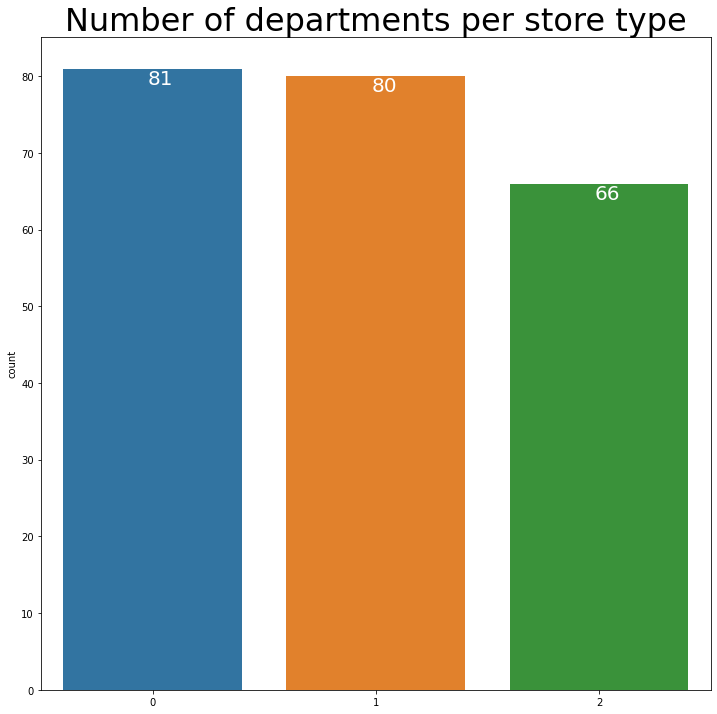

In [187]:
plt.figure(figsize=(12,12))
ax = sns.countplot(data = df.groupby('Type')['Dept'].unique())
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.38, p.get_height()-2),fontsize = 20, color = 'w')
plt.title("Number of departments per store type",fontsize = 32);

In [185]:
# Either the size of the missing department is huge, or Type A simply has bigger size per department

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

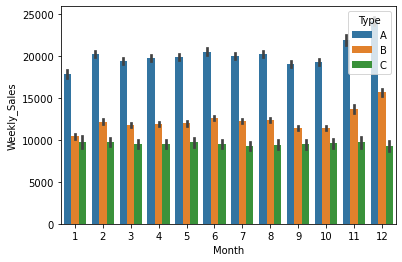

In [224]:
sns.barplot(data = df, x = 'Month', y = 'Weekly_Sales', hue = 'Type')